# Exploring NYPD Arrests Data

The code performs an initial exploration of the NYPD Arrests dataset by:

1. **Loading the Data**: The dataset is read from a CSV file into a DataFrame.
2. **Previewing the Data**: Displays the first few rows to understand its structure and content.
3. **Summarizing the Dataset**:
   - Outputs metadata like column names, non-null counts, and data types (`info()`).
   - Provides a statistical summary of numeric columns (`describe()`).

In [173]:
import pandas as pd

# Load the data from the provided Excel file
file_path = 'NYPD_Arrests_Data__Historic_.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its summary
data_head = data.head()
data_info = data.info()
data_description = data.describe()

data_head, data_info, data_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5725522 entries, 0 to 5725521
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          object 
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
 18  Lon_Lat            object 
dtypes: float64(7), int64(2), object(10)
memory usage: 830.0+ MB


(   ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
 0   186134240  08/07/2018  184.0                             NaN    NaN   
 1   220476154  11/13/2020  397.0  ROBBERY,OPEN AREA UNCLASSIFIED  105.0   
 2   199148493  07/01/2019  440.0                             NaN    NaN   
 3   209928408  02/22/2020  569.0           MARIJUANA, SALE 4 & 5  235.0   
 4   220330574  11/10/2020  101.0                       ASSAULT 3  344.0   
 
                       OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
 0                           NaN  PL 12070E1          F           K   
 1                       ROBBERY  PL 1600500          F           B   
 2                           NaN  PL 1553502          F           M   
 3               DANGEROUS DRUGS  PL 2214000          M           M   
 4  ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           B   
 
    ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX       PERP_RACE  \
 0               73                0.

# Data Cleaning and Encoding

This code performs the following steps:

1. **Handle Missing Values**:
   - Rows with any missing values are dropped using `dropna()`.

2. **Encode Categorical Variables**:
   - All categorical columns are encoded using `LabelEncoder` to transform them into numerical representations.
   - A `LabelEncoder` instance is created for each categorical column and stored in a dictionary (`label_encoders`) for future decoding or transformation.

3. **Verify Missing Values**:
   - After cleaning, it checks for any remaining missing values in the dataset.

Finally, the code outputs:
- The total count of remaining missing values (`remaining_na`).
- The first few rows of the cleaned dataset (`data_clean.head()`).


In [174]:
from sklearn.preprocessing import LabelEncoder

# Dropping rows with any missing values
data_clean = data.dropna()

# Encoding categorical variables
label_encoders = {}
categorical_columns = data_clean.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    data_clean[col] = le.fit_transform(data_clean[col])
    label_encoders[col] = le

# Check for any remaining missing values
remaining_na = data_clean.isnull().sum().sum()

remaining_na, data_clean.head()


/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_2077/3471321174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col] = le.fit_transform(data_clean[col])
/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_2077/3471321174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col] = le.fit_transform(data_clean[col])
/var/folders/5y/f3scdj0s7m35579grwsl0n680000gn/T/ipykernel_2077/3471321174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

(0,
    ARREST_KEY  ARREST_DATE  PD_CD  PD_DESC  KY_CD  OFNS_DESC  LAW_CODE  \
 1   220476154         5706  397.0      328  105.0         78      1014   
 3   209928408          950  569.0      229  235.0         16      1484   
 4   220330574         5652  101.0       25  344.0          7       414   
 5   220509245         5724  223.0       38  107.0          9       853   
 6   220532691         5724  109.0       24  106.0         24       440   
 
    LAW_CAT_CD  ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE  AGE_GROUP  \
 1           1            0               40                0.0         22   
 3           3            2               32                0.0         22   
 4           3            0               49                0.0         22   
 5           1            2               19                0.0         34   
 6           1            1               77                0.0         34   
 
    PERP_SEX  PERP_RACE  X_COORD_CD  Y_COORD_CD   Latitude  Longitude  Lon

# Data Preparation and Splitting

This code prepares the data and performs the following steps:

1. **Filter Rare Classes**:
   - Removes classes with fewer than 2 instances to ensure sufficient data for modeling.

2. **Redefine Features and Target**:
   - Sets `X` as the features and `y` as the target variable, excluding the rare classes.

3. **Train-Test Split**:
   - Splits the data into training and testing sets (80%-20%) using stratified sampling to preserve class proportions.


In [175]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier



# Count the instances of each class
class_counts = y.value_counts()

# Filter classes with at least two instances
filtered_classes = class_counts[class_counts > 1].index

# Filter your data to include only these classes
filtered_data = data_clean[data_clean['OFNS_DESC'].isin(filtered_classes)]

# Redefine X and y with the filtered data
X = filtered_data.drop(['OFNS_DESC'], axis=1)
y = filtered_data['OFNS_DESC']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Decision Tree Model Training and Evaluation

1. **Train Model**: A Decision Tree Classifier is trained on the training data.
2. **Predict**: Predictions are made on the test data.
3. **Evaluate**: Outputs accuracy and a classification report.


In [176]:
# Train a Decision Tree Model without SMOTE
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(1.0,
 '              precision    recall  f1-score   support\n\n           2       1.00      1.00      1.00        35\n           3       1.00      1.00      1.00        66\n           4       1.00      1.00      1.00      1311\n           5       1.00      1.00      1.00       174\n           6       1.00      1.00      1.00       467\n           7       1.00      1.00      1.00    121398\n           8       1.00      1.00      1.00      1897\n           9       1.00      1.00      1.00     17923\n          10       1.00      1.00      1.00       114\n          11       1.00      1.00      1.00        41\n          12       1.00      1.00      1.00        95\n          13       1.00      1.00      1.00     10015\n          15       1.00      1.00      1.00     41167\n          16       1.00      1.00      1.00    225106\n          18       1.00      1.00      1.00      6207\n          20       1.00      1.00      1.00        11\n          21       1.00      1.00      1.00       116\n

# Predicted Offense Count Analysis

1. **Count Predicted Classes**:
   - Uses `Counter` to count occurrences of each predicted class from `y_pred`.

2. **Decode Predictions**:
   - Translates numerical predictions back to offense descriptions using the `LabelEncoder`.

3. **Sort Predictions**:
   - Sorts the offenses by their predicted counts in descending order for easier interpretation.

The result is a dictionary (`sorted_offense_predictions`) showing the most frequently predicted offenses and their counts.


In [177]:
from collections import Counter

# Count occurrences of each predicted class
predicted_counts = Counter(y_pred)

# Translate numerical predictions back to offense descriptions
offense_predictions = {label_encoders['OFNS_DESC'].inverse_transform([offense])[0]: count for offense, count in predicted_counts.items()}

# Sort offenses by most common predictions
sorted_offense_predictions = dict(sorted(offense_predictions.items(), key=lambda item: item[1], reverse=True))

sorted_offense_predictions


{'DANGEROUS DRUGS': 225106,
 'ASSAULT 3 & RELATED OFFENSES': 121398,
 'FELONY ASSAULT': 53165,
 'CRIMINAL TRESPASS': 41167,
 'FORGERY': 18939,
 'BURGLARY': 17923,
 'CRIMINAL MISCHIEF & RELATED OF': 10015,
 'DISORDERLY CONDUCT': 6207,
 'FRAUDS': 4309,
 'GRAND LARCENY OF MOTOR VEHICLE': 4220,
 'GAMBLING': 2927,
 'HARASSMENT': 2179,
 'FORCIBLE TOUCHING': 2042,
 "BURGLAR'S TOOLS": 1897,
 'ALCOHOLIC BEVERAGE CONTROL LAW': 1311,
 'FRAUDULENT ACCOSTING': 489,
 'HARRASSMENT 2': 486,
 'ARSON': 467,
 'ANTICIPATORY OFFENSES': 174,
 'ENDAN WELFARE INCOMP': 116,
 'CANNABIS RELATED OFFENSES': 114,
 'CHILD ABANDONMENT/NON SUPPORT 1': 95,
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 66,
 'ESCAPE 3': 61,
 'CHILD ABANDONMENT/NON SUPPORT': 41,
 'ADMINISTRATIVE CODES': 35,
 'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 28,
 'DISRUPTION OF A RELIGIOUS SERVICE': 11,
 'F.C.A. P.I.N.O.S.': 2,
 'FELONY SEX CRIMES': 1}

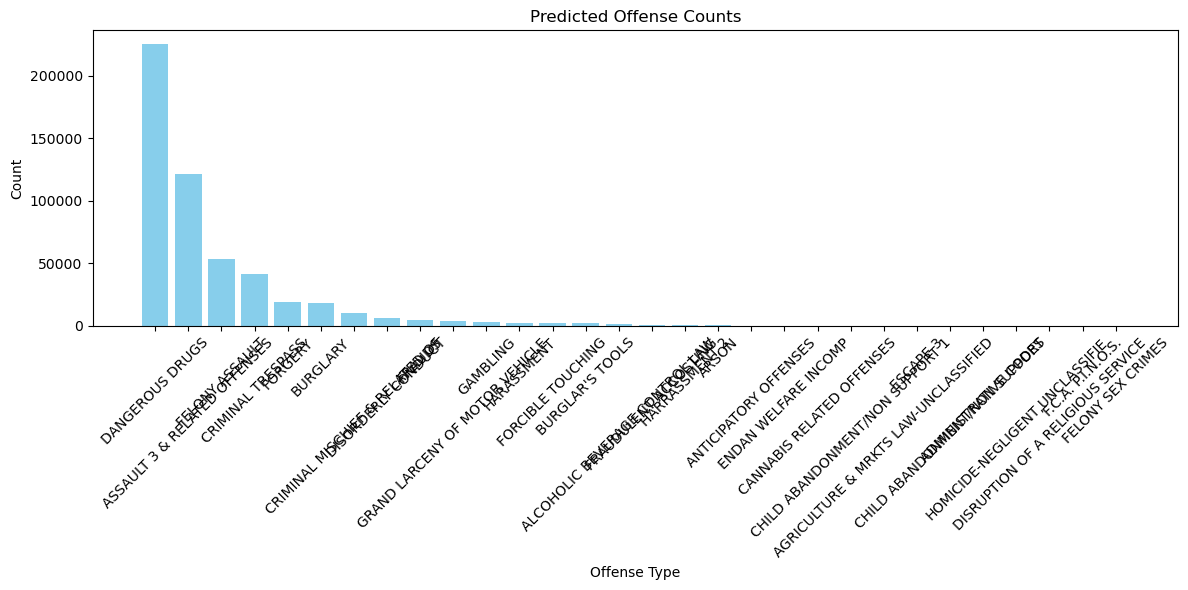

In [192]:
import matplotlib.pyplot as plt
offenses = list(sorted_offense_predictions.keys())
counts = list(sorted_offense_predictions.values())

# Create a bar chart for offense predictions
plt.figure(figsize=(12, 6))
plt.bar(offenses, counts, color="skyblue")
plt.title("Predicted Offense Counts")
plt.xlabel("Offense Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Predicted Offense Counts Visualization

This code visualizes the top 10 most common predicted offenses:

1. **Filter Top Offenses**:
   - Selects the top 10 offenses based on their predicted counts from `sorted_offense_predictions`.

2. **Prepare Data**:
   - Extracts offense descriptions and counts into separate lists.

3. **Plot Bar Chart**:
   - Displays a bar chart showing the frequency of the top 10 offenses.
   - Adjusts x-axis label rotation and layout for improved readability.

The resulting chart highlights the most frequently predicted offenses for easy analysis.


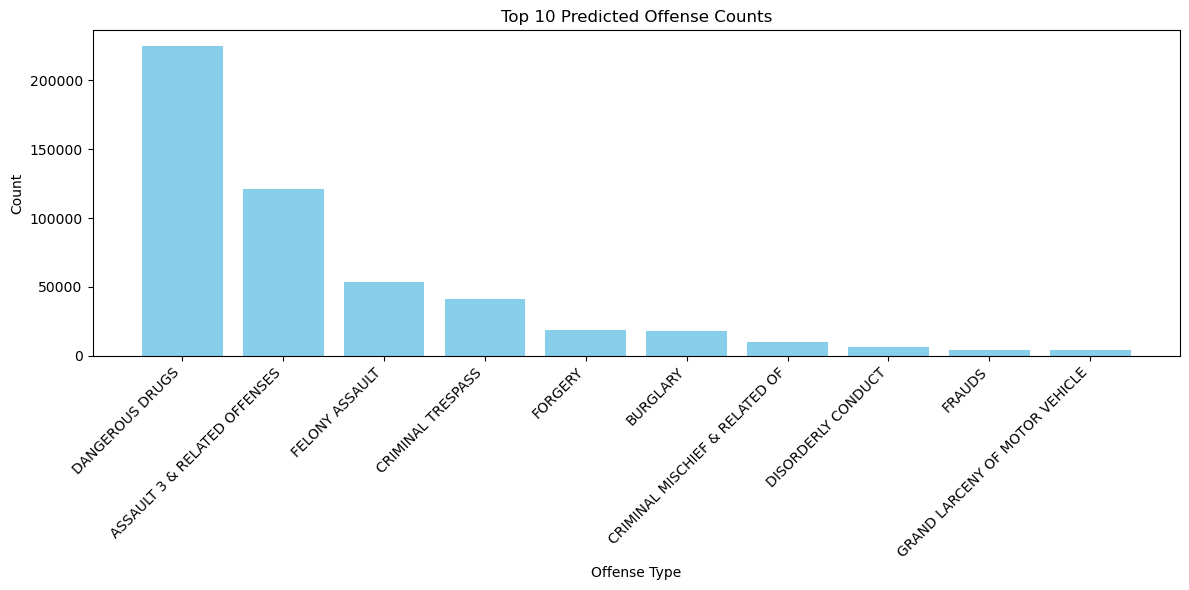

In [194]:
# Limit to top 10 most common offenses for clarity
top_offenses = dict(list(sorted_offense_predictions.items())[:10])

# Convert to two lists for plotting
offenses = list(top_offenses.keys())
counts = list(top_offenses.values())

# Improved bar chart
plt.figure(figsize=(12, 6))  # Increased size
plt.bar(offenses, counts, color="skyblue")
plt.title("Top 10 Predicted Offense Counts")
plt.xlabel("Offense Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate and align labels
plt.tight_layout()  # Adjust layout
plt.show()
